<a href="https://colab.research.google.com/github/marcelokoh/marcelokoh.github.io/blob/main/ensemble_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S&P 500 Weekly Closing Price Prediction

# Predicting Next Week's S&P 500 Closing Prices: A Model Analysis¶
In this Kaggle notebook, we delve into the realm of financial prediction, aiming to forecast the closing prices of the S&P 500 Index for the upcoming week. This endeavor is not merely an exercise in data science, but a valuable tool for investors and financial analysts seeking to make informed decisions in the dynamic world of stock markets.

By leveraging machine learning models, we unlock the potential to anticipate market trends and make strategic investment choices. The predictive power of this analysis can aid in optimizing portfolios, managing risks, and capitalizing on emerging opportunities. With a dataset spanning from May 7, 2018, to May 1, 2023, we have a robust historical context to inform our predictions.

Mastering the art of financial forecasting not only hones our data science skills but also equips us with a powerful toolset for real-world applications. This ability to derive actionable insights from financial data is a highly sought-after skill in the job market, as it empowers employers to navigate the complexities of the financial landscape with confidence and precision. Join us on this journey as we unravel the secrets of market prediction using Python and machine learning! Let's embark on this illuminating voyage!

In [ ]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns    # For enhanced data visualization
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots

from sklearn import metrics   # For evaluation metrics
from sklearn import preprocessing   # For data preprocessing tasks
from sklearn.model_selection import train_test_split, TimeSeriesSplit   # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression   # For building a linear regression model
from sklearn.tree import DecisionTreeRegressor # For building a decision tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # random forest and gradient boosting models
from sklearn.svm import SVR # svr models
from sklearn.neighbors import KNeighborsRegressor # KNN
from sklearn.model_selection import KFold, cross_val_score   # For cross-validation
from xgboost import XGBRegressor

In [ ]:
df = pd.read_csv('SP500_weekly.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,5/7/2018,2680.340088,2732.860107,2655.199951,2727.719971,17181050000
1,5/14/2018,2738.469971,2742.100098,2701.909912,2712.969971,16395450000
2,5/21/2018,2735.389893,2742.239990,2707.379883,2721.330078,16071790000
3,5/28/2018,2705.110107,2736.929932,2676.810059,2734.620117,15245210000
4,6/4/2018,2741.669922,2779.899902,2739.510010,2779.030029,17477350000


**we define necessary functions to modularize our code**

In [ ]:
def check_dtypes(df):
    """
    Checks the data types of columns in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        pd.DataFrame: A DataFrame with columns 'Column Name' and 'Data Type'.
    """
    dtypes = []
    for col in df.columns:
        # For each column, apply the 'type' function to get unique data types
        dtypes.append((col, df[col].apply(type).unique()))

    # Convert the list of tuples to a DataFrame with appropriate column names
    return pd.DataFrame(dtypes, columns=['Column Name', 'Data Type'])

def eda(df):
    """
    Performs Exploratory Data Analysis (EDA) on a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        None
    """
    # Check Data Types
    print("===== Data Types =====")
    print(check_dtypes(df))

    # Column names
    print("\n===== Column Names =====")
    print(df.columns)

    # Head
    print("\n===== Head =====")
    print(df.head())

    # Tail
    print("\n===== Tail =====")
    print(df.tail())

    # Summary Statistics
    print("\n===== Summary Statistics =====")
    print(df.describe())

    # Missing Values
    print("\n===== Missing Values =====")
    print(df.isna().sum())

    # checks for duplicated Rows
    if df.duplicated().any():
        print("\n===== Duplicated Rows =====")
        print(df[df.duplicated()])
        print("Duplicated rows found in the DataFrame.")
    else:
        print("\n===== Message =====")
        print("No duplicated rows found in the DataFrame.")

eda(df)

===== Data Types =====
  Column Name          Data Type
0        Date    [<class 'str'>]
1        Open  [<class 'float'>]
2        High  [<class 'float'>]
3         Low  [<class 'float'>]
4       Close  [<class 'float'>]
5      Volume    [<class 'int'>]

===== Column Names =====
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

===== Head =====
        Date         Open         High          Low        Close       Volume
0   5/7/2018  2680.340088  2732.860107  2655.199951  2727.719971  17181050000
1  5/14/2018  2738.469971  2742.100098  2701.909912  2712.969971  16395450000
2  5/21/2018  2735.389893  2742.239990  2707.379883  2721.330078  16071790000
3  5/28/2018  2705.110107  2736.929932  2676.810059  2734.620117  15245210000
4   6/4/2018  2741.669922  2779.899902  2739.510010  2779.030029  17477350000

===== Tail =====
          Date         Open         High          Low        Close  \
256   4/3/2023  4102.200195  4133.129883  4069.840088  4105.020020   
25

# Data Visualization¶
This code generates a set of histograms to visualize the distribution of each variable in the dataset. It helps us understand the range and spread of values for each feature. This can be useful in identifying patterns, outliers, and potential relationships between variables.

<ipython-input-5-4fd8be20aa8a>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, edgecolor="0", palette='viridis', ax=axes[row, col_idx], multiple='dodge', shrink=0.8)
<ipython-input-5-4fd8be20aa8a>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, edgecolor="0", palette='viridis', ax=axes[row, col_idx], multiple='dodge', shrink=0.8)
<ipython-input-5-4fd8be20aa8a>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, edgecolor="0", palette='viridis', ax=axes[row, col_idx], multiple='dodge', shrink=0.8)
<ipython-input-5-4fd8be20aa8a>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, edgecolor="0", palette='viridis', ax=axes[row, col_idx], multiple='dodge', shrink=0.8)
<ipython-input-5-4fd8be20aa8a>:12: UserW

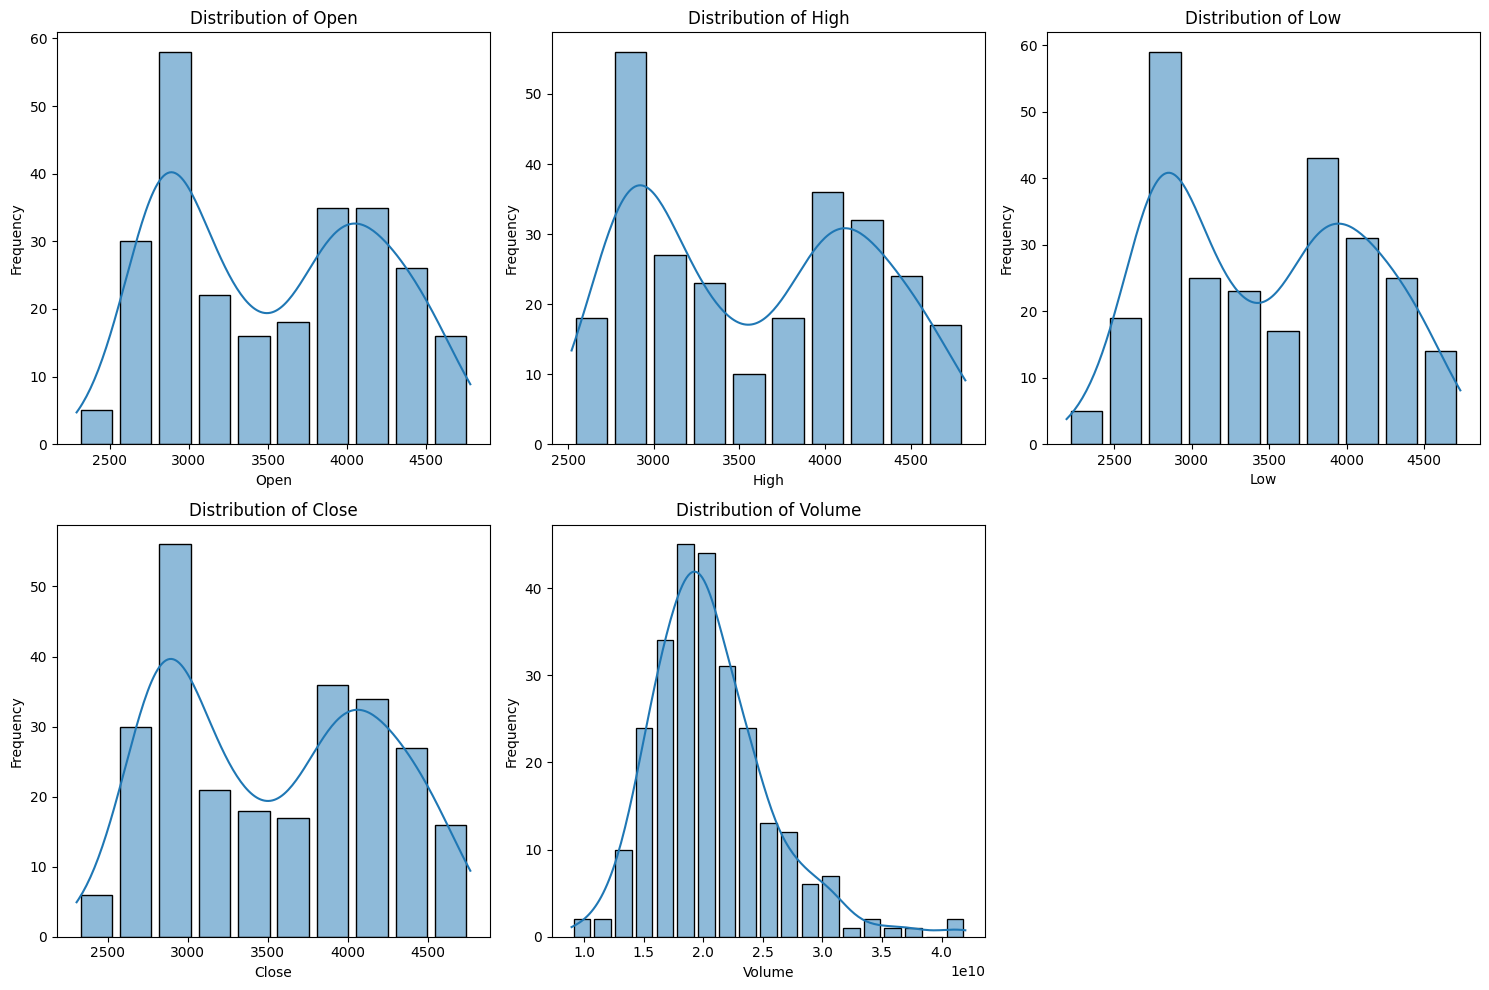

In [ ]:
# Select the columns to be plotted (excluding 'Date')
plot_cols = df.drop(columns=['Date']).columns

# Calculate the number of rows for subplots
n_cols = 3
n_rows = -(-len(plot_cols) // n_cols)  # ceil division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), squeeze=False)

for i, col in enumerate(plot_cols):
    row, col_idx = divmod(i, n_cols)
    sns.histplot(data=df, x=col, kde=True, edgecolor="0", palette='viridis', ax=axes[row, col_idx], multiple='dodge', shrink=0.8)
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i+1, n_rows*n_cols):
    row, col_idx = divmod(j, n_cols)
    fig.delaxes(axes[row][col_idx])

plt.tight_layout()
plt.show()

This code generates scatter plots to visualize the relationship between each feature and the target variable 'Close'. This helps us understand how changes in individual features may impact the closing prices, providing valuable insights for our prediction model.

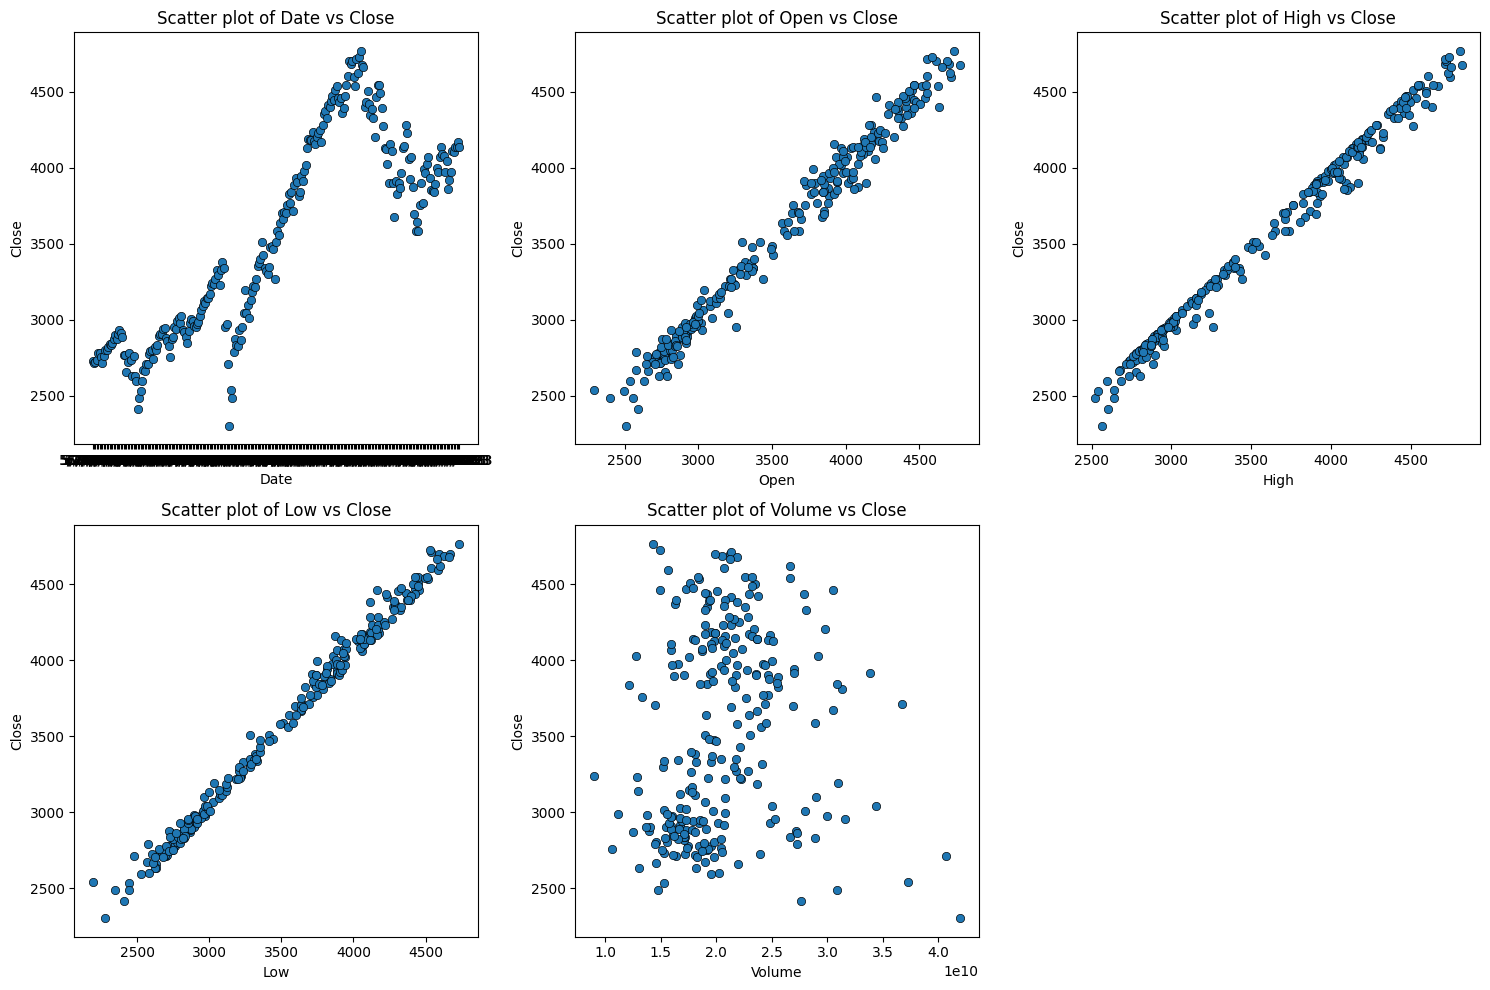

In [ ]:
# Select the target column for the y-axis
target_col = 'Close'

# Select the features (excluding the target column)
features = df.drop(columns=[target_col])

# Calculate the number of rows for subplots
n_cols = 3
n_rows = (len(features.columns) + n_cols - 1) // n_cols  # ceil division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), squeeze=False)

for i, col in enumerate(features.columns):
    row, col_idx = divmod(i, n_cols)
    sns.scatterplot(data=df, x=col, y=target_col, edgecolor="0", ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Scatter plot of {col} vs {target_col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel(target_col)

# Remove empty subplots
for j in range(i+1, n_rows*n_cols):
    row, col_idx = divmod(j, n_cols)
    fig.delaxes(axes[row][col_idx])

plt.tight_layout()
plt.show()

# Time Series Analysis:¶
Time series analysis is crucial for understanding the underlying patterns and behaviors of data over time. It enables us to uncover trends, seasonal variations, and cyclical patterns that may influence the target variable. In this section, we'll perform time series analysis on our dataset to gain valuable insights for our forecasting model.

The code block below will help us in achieving this by decomposing the time series data into its components - trend, seasonal, and residual.

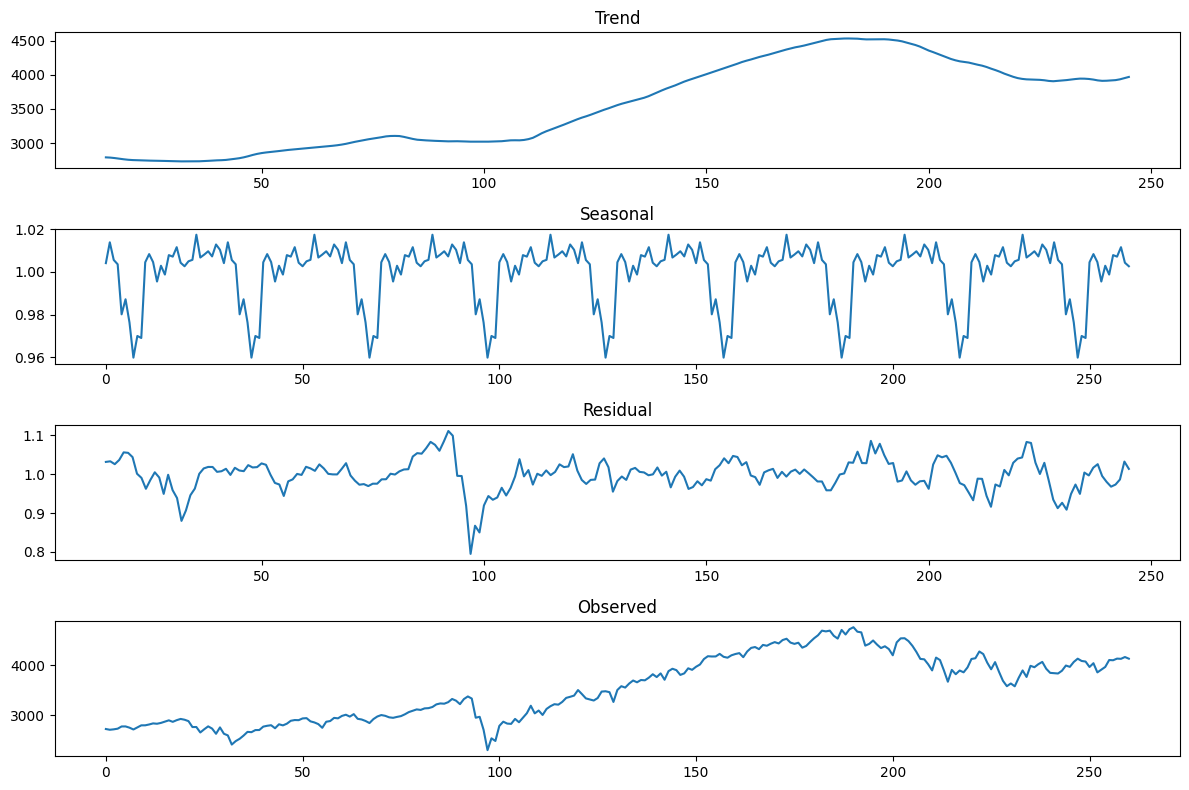

In [ ]:
# Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into components
result = seasonal_decompose(df['Close'], model='multiplicative', period=30)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(412)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(413)
plt.plot(result.resid)
plt.title('Residual')
plt.subplot(414)
plt.plot(result.observed)
plt.title('Observed')
plt.tight_layout()
plt.show()

In time series analysis, the components of a time series data can be broken down into three main parts:

Trend: This component represents the underlying long-term progression of the data. It captures the overall direction in which the data is moving. A trend could be ascending (increasing), descending (decreasing), or stable (constant).

Seasonal: The seasonal component reflects regular, recurring patterns or fluctuations that occur within a specific time period, often driven by calendar or seasonal events. For example, sales of winter clothing tend to increase in the colder months and decrease in the warmer months.

Residual (or Error): The residual component represents the random, unpredictable fluctuations or noise in the data that cannot be attributed to the trend or seasonal patterns. It is the difference between the observed value and the predicted value based on the trend and seasonal components.

By decomposing a time series into these components, we gain a better understanding of the underlying patterns and variations in the data. This information is valuable for building accurate forecasting models, as it helps us account for trends and seasonal effects.

# Autocorrelation and Partial Autocorrelation (ACF and PACF)
These plots are essential tools in time series analysis. They help us understand the relationships between a time series and its lagged values. Autocorrelation measures the correlation between a time series and its lagged values at different time intervals. Partial autocorrelation, on the other hand, measures the correlation between a time series and its lagged values, while controlling for the effect of intervening lags.

These plots are crucial for identifying potential lag values that can be used as inputs in time series forecasting models. By examining the ACF and PACF plots, we can gain insights into the optimal lag order to capture the temporal dependencies in the data.

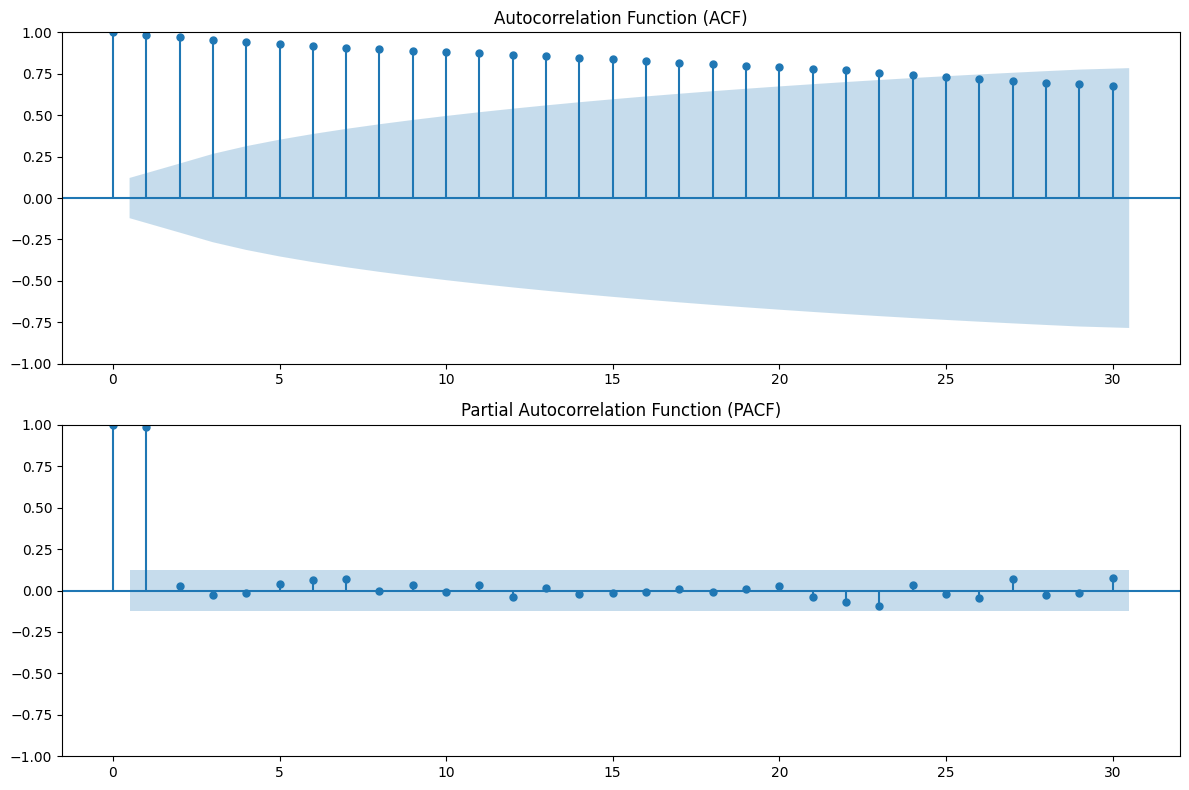

In [ ]:
# Plot Autocorrelation and Partial Autocorrelation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF Plot
plot_acf(df['Close'], lags=30, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF Plot
plot_pacf(df['Close'], lags=30, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Lag Analysis
In Lag Analysis, we're examining how different lag values (time shifts) affect the target variable. This helps us understand the temporal relationships in the data and identify potential lag values that might be useful for forecasting. This analysis can guide us in choosing appropriate lag values for time series models.

In [ ]:
# Define a range of lag values to analyze
lags_to_test = [1, 7, 14, 30]

# Create a DataFrame to store lagged values
lagged_df = pd.DataFrame()

# Iterate over lag values
for lag in lags_to_test:
    # Create a new column with lagged values
    lagged_df[f'Close_lag_{lag}'] = df['Close'].shift(lag)

# Concatenate the lagged DataFrame with the original DataFrame
df_with_lags = pd.concat([df, lagged_df], axis=1)

# Display the DataFrame with lagged values
print(df_with_lags.head())

        Date         Open         High          Low        Close       Volume  \
0   5/7/2018  2680.340088  2732.860107  2655.199951  2727.719971  17181050000   
1  5/14/2018  2738.469971  2742.100098  2701.909912  2712.969971  16395450000   
2  5/21/2018  2735.389893  2742.239990  2707.379883  2721.330078  16071790000   
3  5/28/2018  2705.110107  2736.929932  2676.810059  2734.620117  15245210000   
4   6/4/2018  2741.669922  2779.899902  2739.510010  2779.030029  17477350000   

   Close_lag_1  Close_lag_7  Close_lag_14  Close_lag_30  
0          NaN          NaN           NaN           NaN  
1  2727.719971          NaN           NaN           NaN  
2  2712.969971          NaN           NaN           NaN  
3  2721.330078          NaN           NaN           NaN  
4  2734.620117          NaN           NaN           NaN  


# Pearson's Coefficient¶
We can also calculate the Pearson correlation coefficient between the Open price and the lagged Open prices. This coefficient measures the strength of the linear relationship between the Open price and the lagged Open prices. A high positive correlation indicates a strong positive linear relationship, while a high negative correlation indicates a strong negative linear relationship

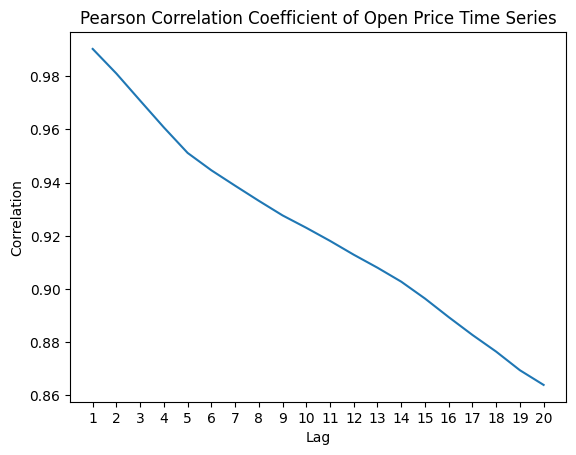

In [ ]:
# Calculate the Pearson correlation coefficient for various lag values
lags = range(1, 21)
correlations = [df["Open"].autocorr(lag=lag) for lag in lags]

# Plot the correlation values against the lag values
plt.plot(lags, correlations)
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.xticks(lags)
plt.title("Pearson Correlation Coefficient of Open Price Time Series")
plt.show()

# time to show a Correlation Matrix Heatmap

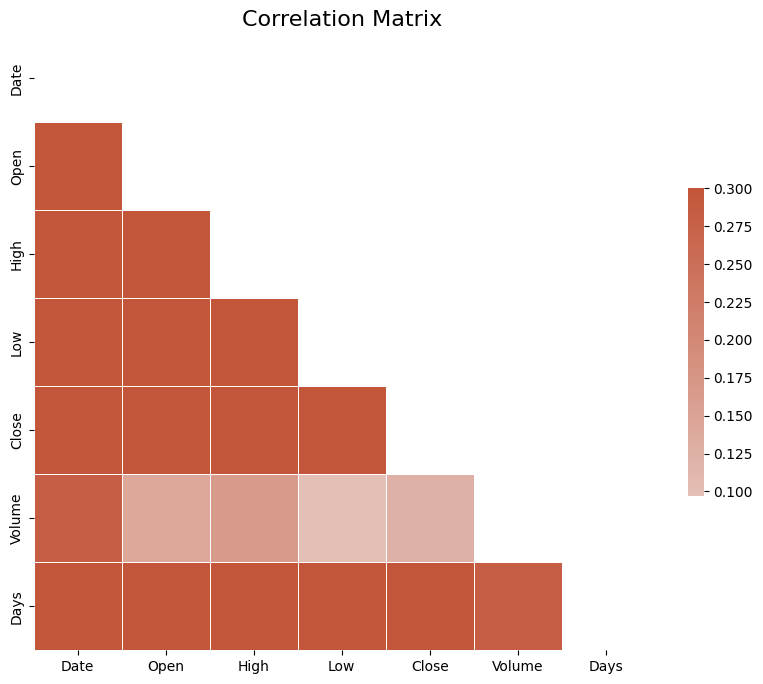

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# Now, you can include 'Days' in the heatmap for correlation analysis

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Define a custom color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title
plt.title("Correlation Matrix", fontsize=16)

# Show the plot
plt.show()

# Feature Engineering
We create a new feature, 'Candle Body', calculated as the absolute difference between the 'Open' and 'Close' prices. The intuition behind this feature is that the 'body' of the candlestick might influence the future price.

In [ ]:
df['Candle_Body'] = abs(df['Open'] - df['Close'])
df

,Date,Open,High,Low,Close,Volume,Days,Candle_Body
0,2018-05-07,2680.340088,2732.860107,2655.199951,2727.719971,17181050000,0,47.379883
1,2018-05-14,2738.469971,2742.100098,2701.909912,2712.969971,16395450000,7,25.500000
2,2018-05-21,2735.389893,2742.239990,2707.379883,2721.330078,16071790000,14,14.059815
3,2018-05-28,2705.110107,2736.929932,2676.810059,2734.620117,15245210000,21,29.510010
4,2018-06-04,2741.669922,2779.899902,2739.510010,2779.030029,17477350000,28,37.360107
...,...,...,...,...,...,...,...,...
256,2023-04-03,4102.200195,4133.129883,4069.840088,4105.020020,15917210000,1792,2.819825
257,2023-04-10,4085.199951,4163.189941,4072.550049,4137.640137,17894880000,1799,52.440186
258,2023-04-17,4137.169922,4169.479980,4113.859863,4133.520020,18104210000,1806,3.649902
259,2023-04-24,4132.069824,4170.060059,4049.350098,4169.479980,18944960000,1813,37.410156


# RSI feature
This code calculates the RSI using a 14-day lookback period. It first computes the daily price changes, then separates gains and losses, and subsequently calculates the average gains and losses. The relative strength (RS) is then computed, and finally, the RSI is derived. The intermediate columns are dropped to keep the DataFrame clean.

This RSI feature can be useful in predicting potential reversals or overbought/oversold conditions in the market.

In [ ]:
# Define the window size for RSI calculation
rsi_window = 14

# Calculate the daily price changes
df['Price Change'] = df['Close'].diff()

# Define the up and down moves
df['Up Move'] = np.where(df['Price Change'] > 0, df['Price Change'], 0)
df['Down Move'] = np.where(df['Price Change'] < 0, abs(df['Price Change']), 0)

# Calculate the average gains and losses
df['Avg Up'] = df['Up Move'].rolling(window=rsi_window).mean()
df['Avg Down'] = df['Down Move'].rolling(window=rsi_window).mean()

# Calculate the relative strength (RS) and RSI
df['RS'] = df['Avg Up'] / df['Avg Down']
df['RSI'] = 100 - (100 / (1 + df['RS']))

# Drop intermediate columns used for calculation
df.drop(['Price Change', 'Days', 'Up Move', 'Down Move', 'Avg Up', 'Avg Down', 'RS'], axis=1, inplace=True)

df

,Date,Open,High,Low,Close,Volume,Candle_Body,RSI
0,2018-05-07,2680.340088,2732.860107,2655.199951,2727.719971,17181050000,47.379883,NaN
1,2018-05-14,2738.469971,2742.100098,2701.909912,2712.969971,16395450000,25.500000,NaN
2,2018-05-21,2735.389893,2742.239990,2707.379883,2721.330078,16071790000,14.059815,NaN
3,2018-05-28,2705.110107,2736.929932,2676.810059,2734.620117,15245210000,29.510010,NaN
4,2018-06-04,2741.669922,2779.899902,2739.510010,2779.030029,17477350000,37.360107,NaN
...,...,...,...,...,...,...,...,...
256,2023-04-03,4102.200195,4133.129883,4069.840088,4105.020020,15917210000,2.819825,62.913901
257,2023-04-10,4085.199951,4163.189941,4072.550049,4137.640137,17894880000,52.440186,62.066709
258,2023-04-17,4137.169922,4169.479980,4113.859863,4133.520020,18104210000,3.649902,57.425512
259,2023-04-24,4132.069824,4170.060059,4049.350098,4169.479980,18944960000,37.410156,60.761802


# Bollinger Bands¶
This code calculates the Bollinger Bands using a window size of 20 and a standard deviation of 2. It computes the rolling mean, upper band, and lower band based on the specified parameters. Then, it plots the S&P 500 Close prices along with the Bollinger Bands.

The resulting plot will show the S&P 500 Close prices in blue, the rolling mean in green, and the upper and lower Bollinger Bands in red, with a shaded region between them. This visualization can help in identifying potential overbought or oversold conditions.

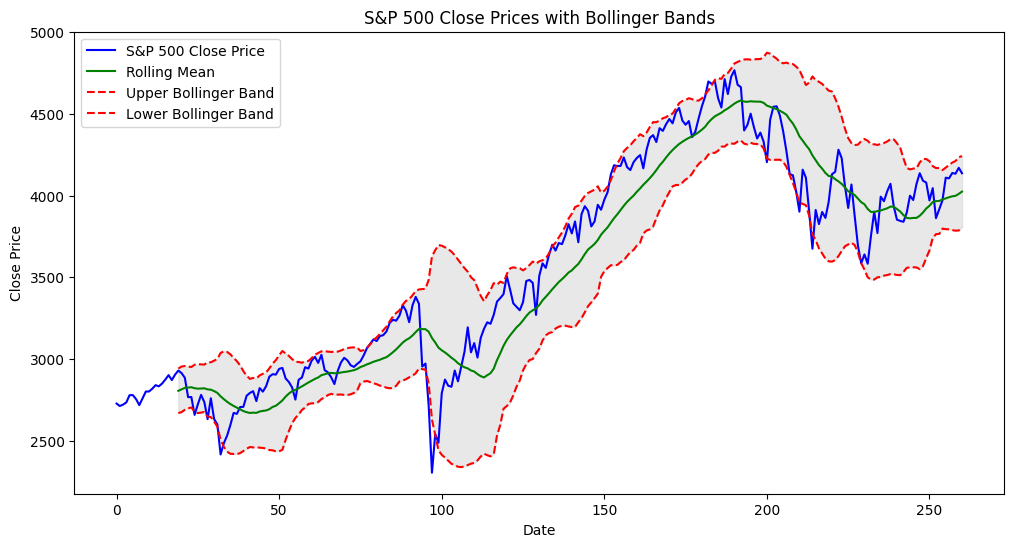

,Date,Open,High,Low,Close,Volume,Candle_Body,RSI,Upper Band,Lower Band
0,2018-05-07,2680.340088,2732.860107,2655.199951,2727.719971,17181050000,47.379883,NaN,NaN,NaN
1,2018-05-14,2738.469971,2742.100098,2701.909912,2712.969971,16395450000,25.500000,NaN,NaN,NaN
2,2018-05-21,2735.389893,2742.239990,2707.379883,2721.330078,16071790000,14.059815,NaN,NaN,NaN
3,2018-05-28,2705.110107,2736.929932,2676.810059,2734.620117,15245210000,29.510010,NaN,NaN,NaN
4,2018-06-04,2741.669922,2779.899902,2739.510010,2779.030029,17477350000,37.360107,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
256,2023-04-03,4102.200195,4133.129883,4069.840088,4105.020020,15917210000,2.819825,62.913901,4185.481083,3793.666964
257,2023-04-10,4085.199951,4163.189941,4072.550049,4137.640137,17894880000,52.440186,62.066709,4201.506439,3788.793610
258,2023-04-17,4137.169922,4169.479980,4113.859863,4133.520020,18104210000,3.649902,57.425512,4211.172638,3785.309418
259,2023-04-24,4132.069824,4170.060059,4049.350098,4169.479980,18944960000,37.410156,60.761802,4233.765329,3786.226737


In [ ]:
# Define the window size and standard deviation for Bollinger Bands
window = 20
std_dev = 2

# Calculate the rolling mean and standard deviation
df['Rolling Mean'] = df['Close'].rolling(window=window).mean()
df['Upper Band'] = df['Rolling Mean'] + (df['Close'].rolling(window=window).std() * std_dev)
df['Lower Band'] = df['Rolling Mean'] - (df['Close'].rolling(window=window).std() * std_dev)

# Plot the S&P 500 Close prices along with Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='S&P 500 Close Price', color='blue')
plt.plot(df['Rolling Mean'], label='Rolling Mean', color='green')
plt.plot(df['Upper Band'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(df['Lower Band'], label='Lower Bollinger Band', color='red', linestyle='--')
plt.fill_between(df.index, df['Upper Band'], df['Lower Band'], color='lightgray', alpha=0.5)
plt.title('S&P 500 Close Prices with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Remove intermediate columns used for calculation
df.drop(['Rolling Mean'], axis=1, inplace=True)
df


In [ ]:
# Calculate Average Volume
df['Average_Volume'] = df['Volume'].rolling(window=30).mean()

# Calculate Volume Rate of Change
df['Volume_Rate_of_Change'] = df['Volume'].pct_change() * 100

# Calculate Volume Momentum (for example, using a window size of 5 days)
n = 5
df['Volume_Momentum'] = df['Volume'].diff(n)

# Display the updated DataFrame
print(df.head())

        Date         Open         High          Low        Close       Volume  \
0 2018-05-07  2680.340088  2732.860107  2655.199951  2727.719971  17181050000   
1 2018-05-14  2738.469971  2742.100098  2701.909912  2712.969971  16395450000   
2 2018-05-21  2735.389893  2742.239990  2707.379883  2721.330078  16071790000   
3 2018-05-28  2705.110107  2736.929932  2676.810059  2734.620117  15245210000   
4 2018-06-04  2741.669922  2779.899902  2739.510010  2779.030029  17477350000   

   Candle_Body  RSI  Upper Band  Lower Band  Average_Volume  \
0    47.379883  NaN         NaN         NaN             NaN   
1    25.500000  NaN         NaN         NaN             NaN   
2    14.059815  NaN         NaN         NaN             NaN   
3    29.510010  NaN         NaN         NaN             NaN   
4    37.360107  NaN         NaN         NaN             NaN   

   Volume_Rate_of_Change  Volume_Momentum  
0                    NaN              NaN  
1              -4.572480              NaN  
2 

Average Volume: This feature provides a smoothed representation of volume trends by calculating the rolling average over a 30-day window.

Volume Rate of Change: It measures the percentage change in volume from one day to the next, providing insights into how volume is changing over time.

Volume Momentum: This feature captures the change in volume compared to 'n' days ago, helping to identify short-term trends in trading activity.

These volume-based features can potentially provide valuable information for modeling and analysis, particularly in the context of financial data.

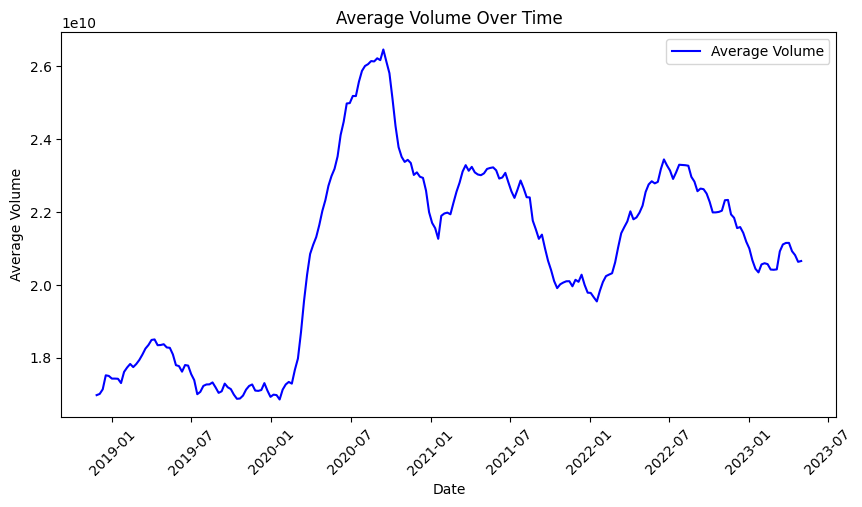

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Average_Volume'], label='Average Volume', color='blue')
plt.title('Average Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)
plt.legend()
plt.show()

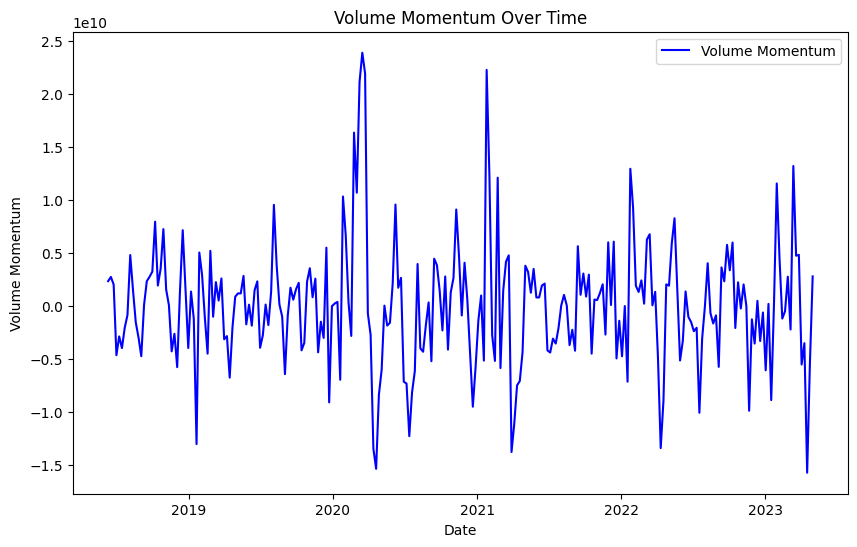

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume_Momentum'], label='Volume Momentum', color='blue')
plt.title('Volume Momentum Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Momentum')
plt.legend()
plt.show()

In [ ]:
# let us remove rows with missing values
df = df.dropna()
df

,Date,Open,High,Low,Close,Volume,Candle_Body,RSI,Upper Band,Lower Band,Average_Volume,Volume_Rate_of_Change,Volume_Momentum
29,2018-11-26,2649.969971,2760.879883,2649.969971,2760.169922,19269950000,110.199951,42.708706,2980.383031,2644.933961,1.696981e+10,47.472151,-2.641960e+09
30,2018-12-03,2790.500000,2800.179932,2621.530029,2633.080078,18159960000,157.419922,34.843836,2990.221587,2618.220405,1.700244e+10,-5.760212,-5.791760e+09
31,2018-12-10,2630.860107,2685.439941,2583.229980,2599.949951,20198330000,30.910156,34.714866,3000.235592,2586.319389,1.712921e+10,11.224529,1.371960e+09
32,2018-12-17,2590.750000,2601.129883,2408.550049,2416.620117,27611110000,174.129883,26.496299,3037.313026,2506.868957,1.751385e+10,36.699965,7.145730e+09
33,2018-12-24,2400.560059,2520.270020,2346.580078,2485.739990,14730860000,85.179931,29.510860,3047.195766,2462.232213,1.749671e+10,-46.648795,1.664020e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2023-04-03,4102.200195,4133.129883,4069.840088,4105.020020,15917210000,2.819825,62.913901,4185.481083,3793.666964,2.114832e+10,-23.656158,-5.542250e+09
257,2023-04-10,4085.199951,4163.189941,4072.550049,4137.640137,17894880000,52.440186,62.066709,4201.506439,3788.793610,2.092053e+10,12.424728,-3.527510e+09
258,2023-04-17,4137.169922,4169.479980,4113.859863,4133.520020,18104210000,3.649902,57.425512,4211.172638,3785.309418,2.081294e+10,1.169776,-1.576376e+10
259,2023-04-24,4132.069824,4170.060059,4049.350098,4169.479980,18944960000,37.410156,60.761802,4233.765329,3786.226737,2.062857e+10,4.643947,-5.431000e+09


Next Week's Open and Close: These features are lagged versions of the opening and closing prices. They represent the opening and closing prices of the following week. Including these lagged values allows your model to learn from past data to make predictions about future values.

In [ ]:
df['Next_Week_Open']=df['Open'].shift(-1)
df['Next_Week_Close']=df['Close'].shift(-1)
df

<ipython-input-19-3cef3516b806>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Next_Week_Open']=df['Open'].shift(-1)
<ipython-input-19-3cef3516b806>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Next_Week_Close']=df['Close'].shift(-1)


,Date,Open,High,Low,Close,Volume,Candle_Body,RSI,Upper Band,Lower Band,Average_Volume,Volume_Rate_of_Change,Volume_Momentum,Next_Week_Open,Next_Week_Close
29,2018-11-26,2649.969971,2760.879883,2649.969971,2760.169922,19269950000,110.199951,42.708706,2980.383031,2644.933961,1.696981e+10,47.472151,-2.641960e+09,2790.500000,2633.080078
30,2018-12-03,2790.500000,2800.179932,2621.530029,2633.080078,18159960000,157.419922,34.843836,2990.221587,2618.220405,1.700244e+10,-5.760212,-5.791760e+09,2630.860107,2599.949951
31,2018-12-10,2630.860107,2685.439941,2583.229980,2599.949951,20198330000,30.910156,34.714866,3000.235592,2586.319389,1.712921e+10,11.224529,1.371960e+09,2590.750000,2416.620117
32,2018-12-17,2590.750000,2601.129883,2408.550049,2416.620117,27611110000,174.129883,26.496299,3037.313026,2506.868957,1.751385e+10,36.699965,7.145730e+09,2400.560059,2485.739990
33,2018-12-24,2400.560059,2520.270020,2346.580078,2485.739990,14730860000,85.179931,29.510860,3047.195766,2462.232213,1.749671e+10,-46.648795,1.664020e+09,2498.939941,2531.939941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2023-04-03,4102.200195,4133.129883,4069.840088,4105.020020,15917210000,2.819825,62.913901,4185.481083,3793.666964,2.114832e+10,-23.656158,-5.542250e+09,4085.199951,4137.640137
257,2023-04-10,4085.199951,4163.189941,4072.550049,4137.640137,17894880000,52.440186,62.066709,4201.506439,3788.793610,2.092053e+10,12.424728,-3.527510e+09,4137.169922,4133.520020
258,2023-04-17,4137.169922,4169.479980,4113.859863,4133.520020,18104210000,3.649902,57.425512,4211.172638,3785.309418,2.081294e+10,1.169776,-1.576376e+10,4132.069824,4169.479980
259,2023-04-24,4132.069824,4170.060059,4049.350098,4169.479980,18944960000,37.410156,60.761802,4233.765329,3786.226737,2.062857e+10,4.643947,-5.431000e+09,4166.790039,4136.250000


We use the MinMaxScaler from sklearn to scale our features. This is important as the features have different ranges and units. Scaling ensures all features are on the same scale, preventing any single feature from dominating the model.

In [ ]:
# Make a copy of the DataFrame excluding the date-time column
df_to_scale = df.drop(columns=['Date'])

# Scale the numeric columns
scaler = preprocessing.MinMaxScaler(feature_range=(2, 3))
scaled_data = scaler.fit_transform(df_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=df_to_scale.columns)

scaled_df

,Open,High,Low,Close,Volume,Candle_Body,RSI,Upper Band,Lower Band,Average_Volume,Volume_Rate_of_Change,Volume_Momentum,Next_Week_Open,Next_Week_Close
0,2.144430,2.104688,2.180207,2.184966,2.312295,2.362451,2.279807,2.050966,2.153003,2.012439,2.645013,2.330760,2.200926,2.133330
1,2.200926,2.121787,2.169020,2.133330,2.278690,2.518282,2.173652,2.055899,2.139629,2.015835,2.324444,2.251363,2.136748,2.119869
2,2.136748,2.071865,2.153954,2.119869,2.340402,2.100786,2.171911,2.060919,2.123659,2.029030,2.426727,2.431939,2.120622,2.045383
3,2.120622,2.035182,2.085240,2.045383,2.564826,2.573427,2.060983,2.079508,2.083883,2.069069,2.580142,2.577478,2.044162,2.073466
4,2.044162,2.000000,2.060862,2.073466,2.174873,2.279882,2.101671,2.084462,2.061536,2.067284,2.078209,2.439301,2.083713,2.092237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2.728258,2.701747,2.738743,2.731373,2.210790,2.008084,2.552522,2.655127,2.728103,2.447390,2.216673,2.257653,2.721423,2.744627
228,2.721423,2.714826,2.739809,2.744627,2.270665,2.171837,2.541088,2.663161,2.725663,2.423680,2.433955,2.308438,2.742316,2.742953
229,2.742316,2.717563,2.756059,2.742953,2.277002,2.010824,2.478444,2.668007,2.723919,2.412480,2.366177,2.000000,2.740266,2.757563
230,2.740266,2.717815,2.730682,2.757563,2.302456,2.122236,2.523475,2.679333,2.724378,2.393289,2.387098,2.260457,2.754224,2.744062


In [ ]:
eda(scaled_df)

===== Data Types =====
              Column Name          Data Type
0                    Open  [<class 'float'>]
1                    High  [<class 'float'>]
2                     Low  [<class 'float'>]
3                   Close  [<class 'float'>]
4                  Volume  [<class 'float'>]
5             Candle_Body  [<class 'float'>]
6                     RSI  [<class 'float'>]
7              Upper Band  [<class 'float'>]
8              Lower Band  [<class 'float'>]
9          Average_Volume  [<class 'float'>]
10  Volume_Rate_of_Change  [<class 'float'>]
11        Volume_Momentum  [<class 'float'>]
12         Next_Week_Open  [<class 'float'>]
13        Next_Week_Close  [<class 'float'>]

===== Column Names =====
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Candle_Body', 'RSI',
       'Upper Band', 'Lower Band', 'Average_Volume', 'Volume_Rate_of_Change',
       'Volume_Momentum', 'Next_Week_Open', 'Next_Week_Close'],
      dtype='object')

===== Head =====
       Open      High  

In [ ]:
# Check for missing values in scaled_df
missing_values = scaled_df.isna().sum()
print(missing_values)

# Replace missing values with mean
scaled_df.fillna(scaled_df.mean(), inplace=True)

Open                     0
High                     0
Low                      0
Close                    0
Volume                   0
Candle_Body              0
RSI                      0
Upper Band               0
Lower Band               0
Average_Volume           0
Volume_Rate_of_Change    0
Volume_Momentum          0
Next_Week_Open           1
Next_Week_Close          1
dtype: int64


# Model Evaluation and Test

In [ ]:
scaled_df.dropna(inplace=True)
# let us first split our dataset
X = scaled_df.drop(columns=['Next_Week_Close', 'Next_Week_Open'] ,axis=1).values
Y = scaled_df['Next_Week_Close'].values.reshape(-1,1)


# Check for missing values in X
missing_values_X = pd.DataFrame(X).isna().sum()
print("Missing values in X:")
print(missing_values_X)

# Check for missing values in Y
missing_values_Y = pd.DataFrame(Y).isna().sum()
print("\nMissing values in Y:")
print(missing_values_Y)

Missing values in X:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

Missing values in Y:
0    0
dtype: int64


In [ ]:

from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

# Function to evaluate model performance (RMSE)
def evaluate_model(model, x_test, y_test):
  predictions = model.predict(x_test)
  rmse = mean_squared_error(y_test, predictions)**(0.5)
  return rmse

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)


# Define individual models with different types
model1 = RandomForestRegressor(n_estimators=100)  # Tree-based model
model2 = XGBRegressor(n_estimators=50)  # Gradient boosting model
model3 = LinearRegression() #linear regression
model4 = SVR(kernel='rbf')  # Support Vector Regression

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
model4.fit(x_train, y_train)

# Create the ensemble model (voting regressor)
ensemble = VotingRegressor(estimators=[("rf", model1), ("xgb", model2), ("lr", model3), ("svr", model4)])

# Train the ensemble model
ensemble.fit(x_train, y_train)

# Evaluate individual models and ensemble on test set
individual_errors = {}
for name, model in zip(["Random Forest", "XGBoost", "Linear Regression", "Support Vector Machine"], [model1, model2, model3, model4]):
  individual_errors[name] = evaluate_model(model, x_test, y_test)

ensemble_error = evaluate_model(ensemble, x_test, y_test)

# Print individual and ensemble model errors (RMSE)
print("Individual Model Errors:")
for name, error in individual_errors.items():
  print(f"{name}: {error:.2f}")

print(f"\nEnsemble Model Error (RMSE): {ensemble_error:.2f}")

# You can further analyze which model performs best and use it for predictions

<ipython-input-24-61209806bd54>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Individual Model Errors:
Random Forest: 0.05
XGBoost: 0.05
Linear Regression: 0.04
Support Vector Machine: 0.08

Ensemble Model Error (RMSE): 0.05


# Handling Overfitting
When a model performs significantly better on the training data compared to the test data, it's a clear sign of overfitting. Overfitting occurs when the model learns the training data too well, including the noise and random fluctuations in the data. As a result, it fails to generalize well to new, unseen data.

Overfitting is a problem because the model may not perform well on real-world data it hasn't seen before. It's important to address overfitting to build a robust and reliable predictive model.

Here are some strategies to improve the test data score and reduce overfitting:

Use More Data: Collecting more data can help the model learn a better representation of the underlying patterns in the data.

Feature Selection/Engineering: Choose relevant features and eliminate irrelevant ones. Sometimes, too many features can lead to overfitting.

Regularization: Apply regularization techniques like L1 (Lasso) or L2 (Ridge) regularization to penalize complex models. This can help prevent the model from fitting noise.

Cross-Validation: Use techniques like k-fold cross-validation to evaluate the model's performance on multiple subsets of the data. This provides a more robust estimate of the model's performance.

Simplify the Model: Consider using simpler models with fewer parameters. For example, in the case of linear regression, reducing the number of features or using simpler algorithms can help.

Ensemble Methods: Use ensemble methods like Random Forest or Gradient Boosting. These methods combine multiple models to reduce overfitting.

Hyperparameter Tuning: Adjust the hyperparameters of the model to find the best configuration that balances bias and variance.

Early Stopping: Monitor the model's performance on a validation set and stop training when the performance plateaus.

# Model Comparison¶
The bar plot above provides a visual representation of how different models perform in predicting the stock prices. Among the models tested, the Linear Regression model shows the highest R-squared score, indicating a better fit to the test data. However, there's still room for improvement. Can you think of ways to enhance the performance of these models?

# Good Luck